In [73]:
#Генерация пассажей, чтение модели

In [79]:
from tqdm import tqdm
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
passage_0 = '''INFO:\nConstruction is the process of constructing a building or infrastructure. Construction differs from manufacturing in that manufacturing typically involves mass production of similar items without a designated purchaser, while construction typically takes place on location for a known client. Construction as an industry comprises six to nine percent of the gross domestic product of developed countries. Construction starts with planning,[citation needed] design, and financing and continues until the project is built and ready for use.'''
passage_1 = '''INFO:\nLarge-scale construction requires collaboration across multiple disciplines. An architect normally manages the job, and a construction manager, design engineer, construction engineer or project manager supervises it. For the successful execution of a project, effective planning is essential. Those involved with the design and execution of the infrastructure in question must consider zoning requirements, the environmental impact of the job, the successful scheduling, budgeting, construction-site safety, availability and transportation of building materials, logistics, inconvenience to the public caused by construction delays and bidding, etc. The largest construction projects are referred to as megaprojects.'''
passage_2 = '''INFO:\nThe Standard Industrial Classification and the newer North American Industry Classification System have a classification system for companies that perform or otherwise engage in construction. To recognize the differences of companies in this sector, it is divided into three subsectors: building construction, heavy and civil engineering construction, and specialty trade contractors. There are also categories for construction service firms (e.g., engineering, architecture) and construction managers (firms engaged in managing construction projects without assuming direct financial responsibility for completion of the construction project).'''
passage_3 = '''INFO:\nThe owner produces a list of requirements for a project, giving an overall view of the project's goals. Several D&B contractors present different ideas about how to accomplish these goals. The owner selects the ideas he or she likes best and hires the appropriate contractor. Often, it is not just one contractor, but a consortium of several contractors working together. Once these have been hired, they begin building the first phase of the project. As they build phase 1, they design phase 2. This is in contrast to a design-bid-build contract, where the project is completely designed by the owner, then bid on, then completed.'''
passage_4 = '''INFO:\nBefore the foundation can be dug, contractors are typically required to verify and have existing utility lines marked, either by the utilities themselves or through a company specializing in such services. This lessens the likelihood of damage to the existing electrical, water, sewage, phone, and cable facilities, which could cause outages and potentially hazardous situations. During the construction of a building, the municipal building inspector inspects the building periodically to ensure that the construction adheres to the approved plans and the local building code. Once construction is complete and a final inspection has been passed, an occupancy permit may be issued.'''
passage_5 = '''INFO:\nNew techniques of building construction are being researched, made possible by advances in 3D printing technology. In a form of additive building construction, similar to the additive manufacturing techniques for manufactured parts, building printing is making it possible to flexibly construct small commercial buildings and private habitations in around 20 hours, with built-in plumbing and electrical facilities, in one continuous build, using large 3D printers. Working versions of 3D-printing building technology are already printing 2 metres (6 ft 7 in) of building material per hour as of January 2013[update], with the next-generation printers capable of 3.5 metres (11 ft) per hour, sufficient to complete a building in a week. Dutch architect Janjaap Ruijssenaars's performative architecture 3D-printed building is scheduled to be built in 2014.'''

In [81]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, BitsAndBytesConfig

device = 'cuda'
#prompt = 'Ты - система ответа на основе поисковой выдачи по кредитам и ипотеке в Сбербанке. Ты получаешь информацию, а потом вопрос, в которой может содержаться ответ.\nТебе необходимо, основываясь на приведенном Content или собственных знаниях ответить на вопрос.\nЕсли в поисковой выдаче есть несколько разных ответов на вопрос, тебе надо выбрать только один самый правдоподобный ответ.\nContent:\nКомбо-ипотека\n\nПродукт и условия кредитования\nСумма кредита: От\xa0трехсот тысяч рублей до\xa0ста миллионов рублей.\nСрок кредитования: До\xa0трехсот шестидесяти месяцев.\nПервоначальный взнос: От пятнадцати процентов.\nПроцентная ставка: Процентная ставка применяется в рамках действующих продуктов, акций, специальных условий.\nКредит может быть предоставлен на цели приобретения или инвестирования всех объектов только у\xa0одного\xa0Продавца, Застройщика или Инвестора, которым может выступать\xa0только юридическое лицо, в том числе управляющая компания паевой инвестиционный фонд или индивидуальный предприниматель.\nУсловия предоставления: Кредит предоставляется при условии, что основным объектом недвижимости выступает квартира и апартаменты, а дополнительными: машино-место, кладовая; Объекты могут комбинироваться по желанию клиента; Общее количество кредитуемых объектов не может превышать трёх.\nКлючевая особенность и преимущество\xa0данной программы:\nКлиент получает\xa0один кредит сразу на несколько объектов\xa0недвижимости с единой ставкой.\nБольше не надо оформлять три разных ипотечных кредита, а обслуживать такую ипотеку гораздо удобнее: одна дата ежемесячного платежа, понятные и прозрачные условия, минимум документов для подачи заявки.\nРаньше клиенту приходилось оформлять\xa0три ипотеки: Оформить целевой кредит на покупку квартиры или апартаментов; Оформить целевой кредит на покупку машино-места, первоначальный взнос от двадцати пяти процентов; Оформить целевой кредит на покупку кладовой, первоначальный взнос от двадцать пяти процентов; Требовалось несколько визитов в банк, чтобы оформить сделку и подписать документы.\nСейчас клиент оформляет один целевой кредит: Оформление кредита на покупку квартиры или апартаментов плюс машино-места или кладовой с единой ставкой на весь срок кредита; Минимальный первоначальный взнос по данной программе пятнадцать процентов.Комбо-ипотека\n\nДокументы, на основании которых можно приобрести объект недвижимости по программе «Комбо-ипотека» Договор купли-продажи; Договор долевого участия; Договор уступки прав требования; Проект договора купли-продажи; Договор паенакопления.\nContent:\nКомбо-ипотека\n\nКомбо-ипотека\xa0- это программа, которая позволяет клиенту оформить один кредит сразу на несколько объектов недвижимости с единой ставкой на весь срок кредитования.\nКомбинации могут самые разные: Можно взять в ипотеку\xa0квартиру + машино-место; Квартиру + кладовую + машино-место.\nНо один объект недвижимости в договоре комбо-ипотеки остается неизменным квартира или апартаменты.\nПриобретение\xa0квартиры или апартаментов с одновременной покупкой машино-мест или кладовых.\nИнвестирование\xa0строительства квартиры или апартаментов с одновременным приобретением машино-места или кладовых.\nВ рамках комбо-ипотеки нельзя\xa0кредитовать связку апартаменты + кладовая.\nContent:\nКомбо-ипотека\nОсобые условия\nПрименимые условия Комбо-ипотека: «Комбо-ипотека» совмещается с программой субсидирования и комплексный продукт; Дисконт за сервис электронной регистрации (СЭР) предоставляется при наличии в сделке не менее 1 сервиса электронной регистрации; Защищенный кредит; Молодая семья; Объекты недвижимости, построенные с участием кредитных средств Банка; Счет эскроу; Аккредитивная форма расчетов; Сервис безопасных расчетов (СБР); Заявки, поданные и рассматриваемые в рамках пилотного проекта по предоставлению Жилищных кредитов физическим лицам, не являющимся гражданами Российской Федерации; Особые заявки; Дисконт за бронирование; Дисконт лояльным клиентам; Дисконт за ПФР; Ипотека плюс; Специальная процентная ставка; Индивидуальные схемы кредитования, если иное не оговорено в соответствующих решениях коллегиальных органов Банка; Дисконт по кредитным заявкам Работников; По двум документам. Ограничения по комбо-ипотеке: У всех Объектов недвижимости единая дата ввода в эксплуатацию и количество Кредитуемых Объектов не превышает трех; Кредит может быть предоставлен на цели приобретения или инвестирования всех объектов только у одного Продавца, Застройщика или Инвестора, которым может выступать только юридическое лицо (в том числе управляющая компания паевой инвестиционный фонд/индивидуальный предприниматель; Страхование залога требуется по каждому объекту недвижимости; В рамках одного кредитного договора возможно приобретение объекта недвижимости / инвестирование строительства более чем по одному Договору основанию; Не совмещается с Госпрограммами; Совмещается с субсидированием и комплексным продуктом (Дисконт по программе «комплексный продукт» применяется при кредитовании объектов (квартира, машино-место(а)) если они указаны в одном договоре инвестирования строительства, с одним счетом эскроу); все объекты должны быть аккредитованы. Не применяется при комбо-ипотеке: Индивидуальный сейф; Витрина скидка 0,3% – 0,7 %; Программы «Господдержка 2020», «Ипотека с государственной поддержкой для семей с детьми», «Дальневосточная ипотека», «Сельская ипотека», «Ипотека для IT»; Программы и Соглашения о сотрудничестве ПАО Сбербанк с субъектами РФ и муниципальными образованиями; Ипотека плюс материнский капитал.\nContent:\nПрограмма «Гараж»\nОсобые условия\nКомбо-ипотеку можно оформить по продуктам: Приобретение готового жилья, акция для застройщиков, и приобретение строящегося жилья, Акция для застройщиков. В один комбо-кредит можно оформить до трех объектов недвижимости с единой ставкой на весь срок кредитования. Один кредит будет включать ипотеку на жильё, машино-место и кладовую. Комбинации могут самые разные, но основной объект - недвижимости в договоре комбо-ипотеки остаётся неизменным – квартира и апартаменты. Нельзя предоставить кредит на оплату исключительно отделочных материалов или ремонтно-отделочных работ. Особые условия, применимые с кредитной программой Гараж:\nЦелевое назначение кредита, приобретение: Гаража; Машиноместа; Гаража с одновременным приобретением земельного участка (доли в праве собственности на земельный участок) на котором он находится; кладовой.\nContent:\nКомбо-ипотека\n\nЭтапы ипотечной сделки по программе «Комбо-ипотека» Подача заявки, Клиент подает стандартную заявку на покупку квартиры в новостройке и указывают стоимость всех объектов одной суммой; Направление документов, Клиент направляет в Банк договор-основание на все объекты в сделке, либо отдельные договоры на каждый объект; Получение одобрения, Клиент получает одобрение банка по объектам недвижимости, записывается на сделку; Сделка, Клиент подписывает кредитную документацию, оформляет сервис регистрации сделки и расчетов.\n"Ограничение по словам: 20."\nQUESTION: Какая минимальная сумма кредита для комбо-ипотеки? \nFINAL ANSWER:'
print(torch.cuda.memory_allocated())

model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-v0.1", torch_dtype=torch.float16)
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")

tokenizer.pad_token = tokenizer.eos_token
model = model.to(device)

19830837760


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [82]:
def generate_answer(question, model, tokenizer, cfg):
    device = 'cuda'
    input_ids = tokenizer.encode(question, return_tensors='pt').to(device)
    return tokenizer.decode(
                model.generate(input_ids,
                        generation_config=cfg, pad_token_id=2)[0][input_ids.shape[1]:])

In [83]:
question = '''QUESTION: What are some existing facilities?\nREASONING:'''

In [84]:
cfg = GenerationConfig(do_sample=True, temperature=0.1, top_p=0.9, max_new_tokens=200, repetition_penalty=1.1)

In [85]:
sys = '''Your task is to answer the question (QUESTION) using only given information (INFO). Do the short reasoning and give short answer.
EXAMPLE:
INFO:
Price controls exacerbated the crisis in the US. The system limited the price of "old oil" (that which had already been discovered) while allowing newly discovered oil to be sold at a higher price to encourage investment. Predictably, old oil was withdrawn from the market, creating greater scarcity. The rule also discouraged development of alternative energies.
QUESTION: What made the oil crisis worse in the US?
REASONING: In INFO Price controls exacerbated the crisis in the US.
FINAL ANSWER: Price controls.
HERE TASK YOU HAVE TO SOLVE:'''

In [86]:
generate_answer('\n'.join([sys, '\n'.join([passage_0, passage_1, passage_2, passage_3, passage_4, passage_5]), question]), model, tokenizer, cfg)

'In INFO Before the foundation can be dug, contractors are typically required to verify and have existing utility lines marked, either by the utilities themselves or through a company specializing in such services. This lessens the likelihood of damage to the existing electrical, water, sewage, phone, and cable facilities, which could cause outages and potentially hazardous situations. During the construction of a building, the municipal building inspector inspects the building periodically to ensure that the construction adheres to the approved plans and the local building code. Once construction is complete and a final inspection has been passed, an occupancy permit may be issued.\nFINAL ANSWER: Existing facilities.</s>й\n\n© BrainMass Inc. brainmass.com October 9, 2019, 8:42 pm ad1c9bdddf\nhttps://brainmass.com/business/construction-management/information-reasoning-answer'

In [87]:
#Запись текста без теста
no_info = '\n'.join([sys, '\n'.join([passage_0, passage_1, passage_2, passage_3, passage_4, passage_5]), question])

In [88]:
cfg = GenerationConfig(do_sample=True, temperature=0.1, top_p=0.9, max_new_tokens=400, repetition_penalty=1.1)

In [89]:
test = '''A) Plumbing and electrical facilities
B) Existing facilities
C) Electrical, water, sewage, phone, and cable facilities
REASONING:'''

In [90]:
question = '''QUESTION: What are some existing facilities?'''

In [91]:
sys = '''Your task is to solve test using only given information(INFO). Do the reasoning before answer. Do the reasoning as in example:
EXAMPLE:
INFO:
Price controls exacerbated the crisis in the US. The system limited the price of "old oil" (that which had already been discovered) while allowing newly discovered oil to be sold at a higher price to encourage investment. Predictably, old oil was withdrawn from the market, creating greater scarcity. The rule also discouraged development of alternative energies.
QUESTION: What made the oil crisis worse in the US?
A) The rule also discouraged development of alternative
B) Price controls
REASONING: In INFO Price controls exacerbated the crisis in the US.
FINAL ANSWER: B) Price controls
HERE TASK YOU HAVE TO SOLVE:'''

In [92]:
generate_answer('\n'.join([sys, '\n'.join([passage_0, passage_1, passage_2, passage_3, passage_4, passage_5]), question, test]), model, tokenizer, cfg)

'In INFO Before the foundation can be dug, contractors are typically required to verify and have existing utility lines marked, either by the utilities themselves or through a company specializing in such services. This lessens the likelihood of damage to the existing electrical, water, sewage, phone, and cable facilities, which could cause outages and potentially hazardous situations.\nFINAL ANSWER: C) Electrical, water, sewage, phone, and cable facilities</s>\n\n© BrainMass Inc. brainmass.com October 9, 2019, 8:50 pm ad1c9bdddf\nhttps://brainmass.com/business/construction-management/information-reasoning-and-answer-task-590804\n\nThis solution provides information, reasoning and answer to a task.\n\n$2.19</s></s></s></s></s></s></s></s></s></s></s></s></s></s></s> инде</s> инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде инде

In [93]:
#Запись с тестом
info = '\n'.join([sys, '\n'.join([passage_0, passage_1, passage_2, passage_3, passage_4, passage_5]), question, test])

In [94]:
input_ids_no = tokenizer.encode(no_info, return_tensors='pt').to(device)

In [95]:
#Загружаем attention

In [96]:
with torch.no_grad():
    g = model(input_ids_no, output_attentions=True, return_dict=True)
print(torch.cuda.memory_allocated())

19883046400


In [97]:
input_ids_yes = tokenizer.encode(info, return_tensors='pt').to(device)

In [98]:
with torch.no_grad():
    g_new = model(input_ids_yes, output_attentions=True, return_dict=True)
print(torch.cuda.memory_allocated())

19953388032


In [99]:
signal = g_new.attentions[-1]
no_signal = g.attentions[-1]

In [100]:
from tqdm import tqdm
import numpy as np
import seaborn as sns

In [101]:
import numpy as np
import seaborn as sns

In [102]:
#id правильного ответа

In [103]:
tokenizer.decode(input_ids_no[0][697:710], return_tensors='pt')

'electrical, water, sewage, phone, and cable facilities'

In [104]:
tokenizer.decode(input_ids_yes[0][712:725], return_tensors='pt')

'electrical, water, sewage, phone, and cable facilities'

In [105]:
def func_attention_calc(range_no, range_yes, png_name, token_start):
    left_no, right_no = range_no
    attention_sum = []
    for bub in tqdm(range(token_start, len(input_ids_no[0])-1)):
        s = np.zeros(right_no - left_no)
        for j in range(32):
            attention_no_variants = no_signal[0][j][bub]
            attention_no_variants = (attention_no_variants[:1000].cpu() / attention_no_variants[185:185+600].cpu().sum())
            s += attention_no_variants[left_no:right_no].cpu().numpy()
        attention_sum.append(s)

    left_yes, right_yes = range_yes
    attention_sum_yes = []
    for bub in tqdm(range(token_start+15, len(input_ids_yes[0])-1)):
        s = np.zeros(right_yes-left_yes)
        for j in range(32):
            attention_variants = signal[0][j][bub]
            attention_variants = (attention_variants[:1000].cpu() / attention_variants[200:200 + 600].cpu().sum())
            s += attention_variants[left_yes:right_yes].cpu().numpy()
        attention_sum_yes.append(s)

    plt.plot(np.array(attention_sum).mean(axis=1), label='Без теста')
    plt.plot(np.array(attention_sum_yes).mean(axis=1), label='С тестом', color='green')
    plt.xlabel('Номер токена')
    plt.ylabel('Суммарный Attention')
    plt.title('Зависимость суммарного Attention от номера токена')
    plt.legend()
    plt.savefig(png_name)
    plt.show()
    return attention_sum, attention_sum_yes

100%|██████████| 526/526 [00:01<00:00, 430.67it/s]


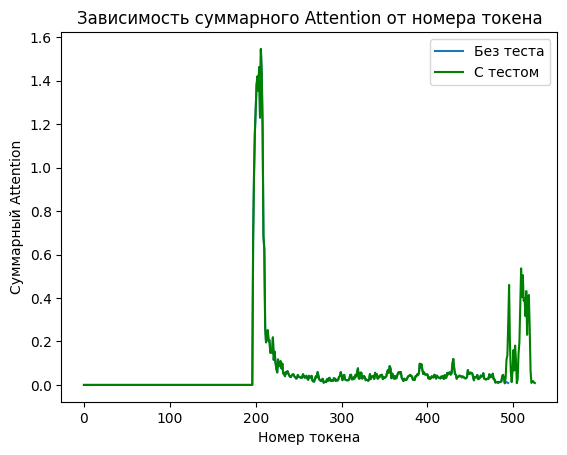

In [106]:
attention_sum, attention_sum_yes = func_attention_calc([697,710],
                                                       [712,725],
                                                       'answer_attention.png',
                                                        500)

In [107]:
def heatmap(attention_sum, attention_sum_yes, num_start, png_name):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    sns.heatmap(attention_sum[num_start:], cmap='coolwarm', ax=axes[0])
    axes[0].set_title('Карта Attention на ответе без теста')
    
    sns.heatmap(attention_sum_yes[num_start:], cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Карта Attention на ответе с тестом')
    
    plt.tight_layout()
    plt.savefig(png_name)
    plt.show()

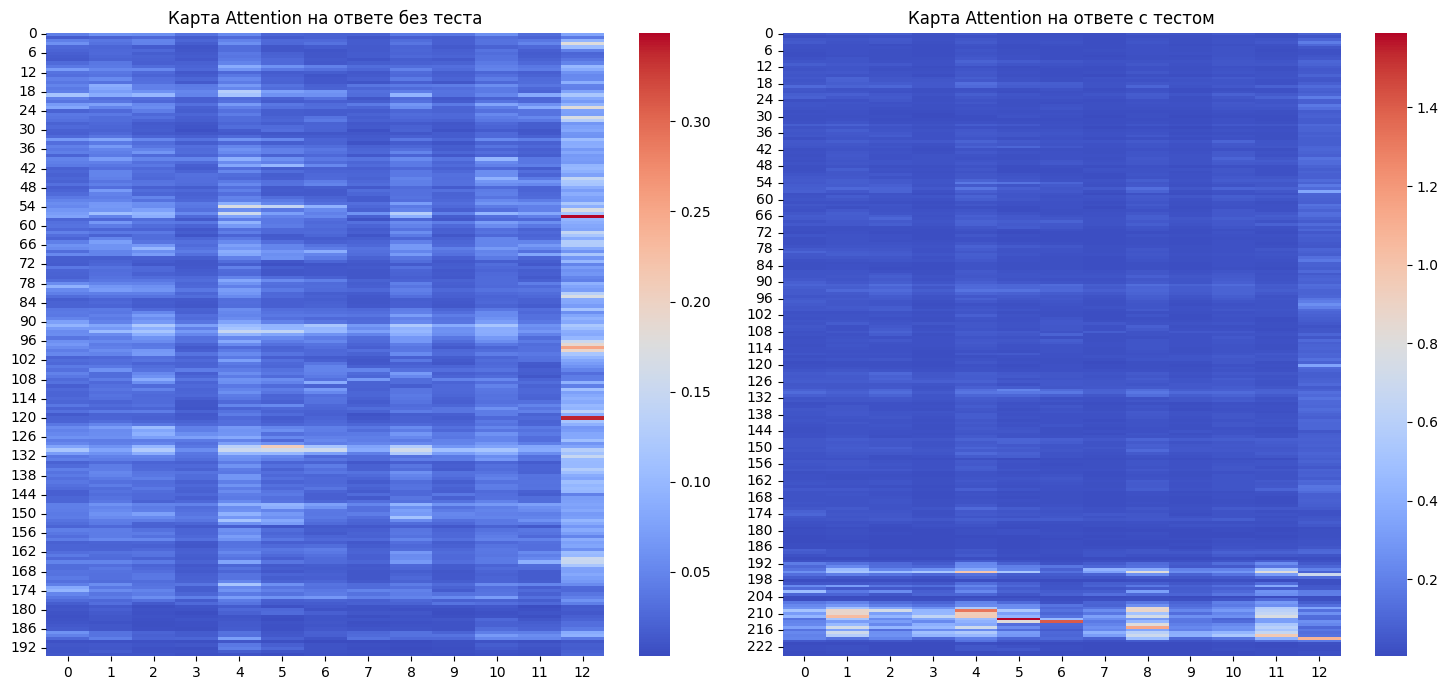

In [108]:
heatmap(attention_sum, attention_sum_yes, 300, 'head_map_answer.png')

100%|██████████| 526/526 [00:01<00:00, 425.40it/s]


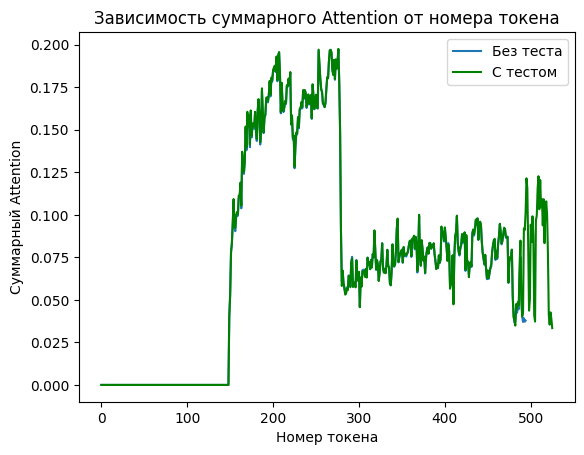

In [109]:
attention_sum, attention_sum_yes = func_attention_calc([649,780],
                                                       [649+15,780+15],
                                                       'attention_passage_answer.png',
                                                       500)

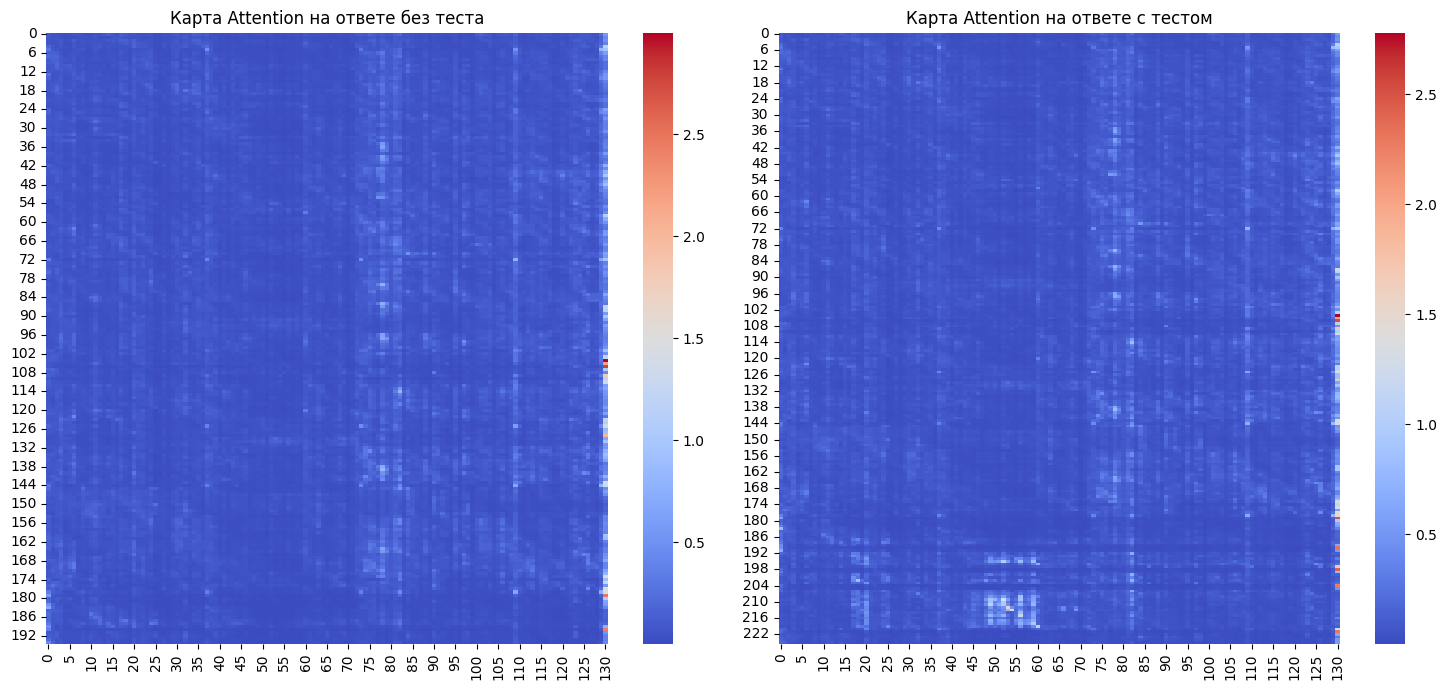

In [110]:
heatmap(attention_sum, attention_sum_yes, 300, 'passage_answer.png')

100%|██████████| 626/626 [00:01<00:00, 424.56it/s]


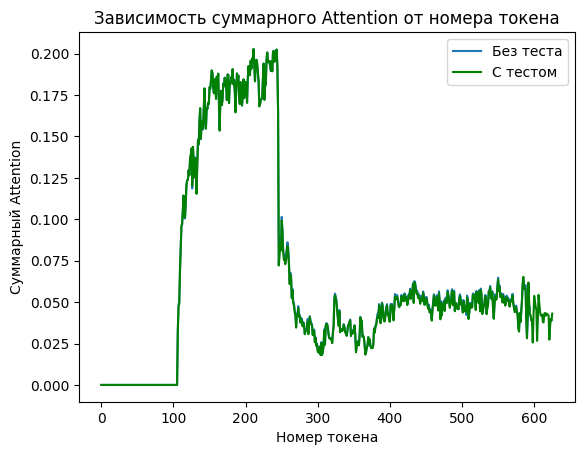

In [113]:
attention_sum, attention_sum_yes = func_attention_calc([506,646],
                                                       [506+15,646+15],
                                                       'attention_passage_no_answer.png',
                                                      400)

In [114]:
tokenizer.decode(input_ids_yes[0][142:147], return_tensors='pt')

'REASONING:'

100%|██████████| 226/226 [00:00<00:00, 430.55it/s]


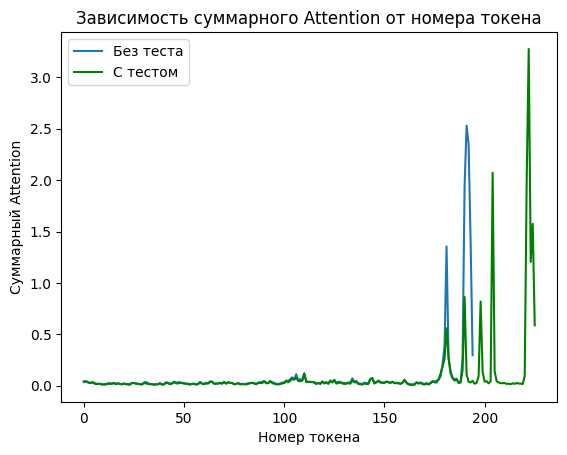

In [117]:
attention_sum, attention_sum_yes = func_attention_calc([142-15,147-15],
                                                       [142,147],
                                                       'reasoning.png',
                                                      800)